In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
df_schemes = pd.read_excel('/Users/AribM/Desktop/Mutual Funds India-Data Analysis/processed_data.xlsx')

In [2]:
# Filtering out Bad performing funds from the df and storing the rest in new df
df_filtered = df_schemes[
    (df_schemes['Estimated_Beta'].between(-5,5)) &   # Remove extremely volatile funds
    (df_schemes['Sharpe_annual'] > 0) &               # Keep funds with positive Sharpe
    (df_schemes['Sortino_Ratio'] > 0)                # Keep funds with decent risk-adjusted returns
]


In [3]:
# Equity funds with high return, high risk and overall good performance 
# Suitable for people with high risk appetite and long term for better returns
# Not for conservative investors and short term investors
df_high_risk = df_filtered[
    (df_filtered['Scheme_Category'].str.contains("Equity Scheme", na=False)) & 
    (df_filtered['CAGR'] > 20) & 
    (df_filtered['Sharpe_annual'] > 1.0) & 
    (df_filtered['Sortino_Ratio'] > 1.0) & 
    (df_filtered['std_dev'].between(1.0, 1.8))
]
df_high_risk.head(10)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Estimated_Beta,alpha,Sortino_Ratio,Sharpe_annual
3,quant Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,100176,quant Small Cap Fund - IDCW Option - Regular Plan,1.332,5,27.082,5.0,2.799,1.104161,1.264811
4,quant Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,100177,quant Small Cap Fund - Growth - Regular Plan,1.332,5,27.034,5.0,2.760,1.102305,1.263006
98,Kotak Mahindra Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,102875,Kotak-Small Cap Fund - Growth,1.033,5,20.992,5.0,-3.139,1.038283,1.268950
217,Nippon India Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,113177,Nippon India Small Cap Fund - Growth Plan - Gr...,1.193,5,23.070,5.0,-0.922,1.027946,1.215533
218,Nippon India Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,113178,Nippon India Small Cap Fund - Growth Plan - Bo...,1.193,5,23.070,5.0,-0.923,1.028021,1.215620
325,Nippon India Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,118777,Nippon India Small Cap Fund - Direct Plan Grow...,1.193,5,24.193,5.0,0.008,1.078126,1.264703
326,Nippon India Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,118778,Nippon India Small Cap Fund - Direct Plan Grow...,1.193,5,24.193,5.0,0.008,1.078130,1.264708
460,Kotak Mahindra Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,120164,Kotak-Small Cap Fund - Growth - Direct,1.032,5,22.659,5.0,-1.740,1.124681,1.354533
514,ICICI Prudential Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,120591,ICICI Prudential Smallcap Fund - Direct Plan -...,1.112,5,22.620,5.0,-1.553,1.053448,1.268297
549,quant Mutual Fund,Open Ended Schemes,Equity Scheme - Multi Cap Fund,120822,quant Active Fund-IDCW Option - Direct Plan,1.276,5,23.712,5.0,-0.159,1.024289,1.174442


In [6]:
# Top funds in the df_top_equity_funds (high risk and high return perspective) :
df_top_equity_funds = df_high_risk
df_top_equity_funds = df_top_equity_funds.sort_values(by='CAGR',ascending=False)
# Removing funds which are same but regular while keeping only direct plans in those cases.
df_top_equity_funds.drop_duplicates(subset=['Fund_House','Scheme_Type','Scheme_Category'],inplace=True)
# If fund house, scheme type and category are same then the two funds are either same or of direct and regular types and since data is sorted we remove the regular plan since it will have lesser CAGR.
df_top_equity_funds.head(5)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Estimated_Beta,alpha,Sortino_Ratio,Sharpe_annual
1158,Bandhan Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,147946,BANDHAN EMERGING BUSINESSES FUND - DIRECT PLAN...,1.082,3,33.355,5.0,6.826,1.580339,1.791863
973,Bank of India Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,145678,BANK OF INDIA Small Cap Fund Direct Plan Growth,1.108,5,30.336,5.0,4.611,1.437974,1.622981
999,Edelweiss Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,146196,Edelweiss Small Cap Fund - Direct Plan - Growth,1.153,4,30.225,5.0,4.677,1.372348,1.563469
948,Tata Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,145207,TATA SmallCap Fund - Direct Plan - Payout of I...,1.099,4,28.966,5.0,3.836,1.394713,1.591755
555,quant Mutual Fund,Open Ended Schemes,Equity Scheme - Small Cap Fund,120828,quant Small Cap Fund - Growth Option - Direct ...,1.332,5,28.373,5.0,3.835,1.154162,1.313623


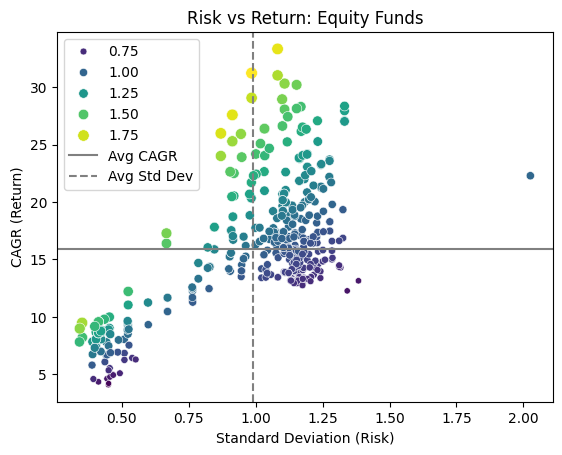

In [7]:
# Now we do have the best equity funds to invest with high risk but high returns
# Let's Analyse the relation of different terms in Equity Schemes with visualizations

# Risk Vs Return Scatterplot (Standard Deviation VS CAGR) of Equity Schemes
df_equity = df_schemes[df_schemes['Scheme_Category'].str.contains("Equity",na=False)]

sns.scatterplot(data=df_equity,x='std_dev',y='CAGR',size='Sharpe_annual',hue='Sharpe_annual',palette='viridis')
plt.axhline(df_equity['CAGR'].mean(), linestyle='solid', color='gray', label="Avg CAGR")
plt.axvline(df_equity['std_dev'].mean(), linestyle='dashed', color='gray', label="Avg Std Dev")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("CAGR (Return)")
plt.title("Risk vs Return: Equity Funds")
plt.legend()
plt.show()

# This scatter plot shows the relation between CAGR and Standard Deviation for Equity Schemes
# Higher CAGR is good for any investor but higher standard deviation is not optimal for doing safer investments

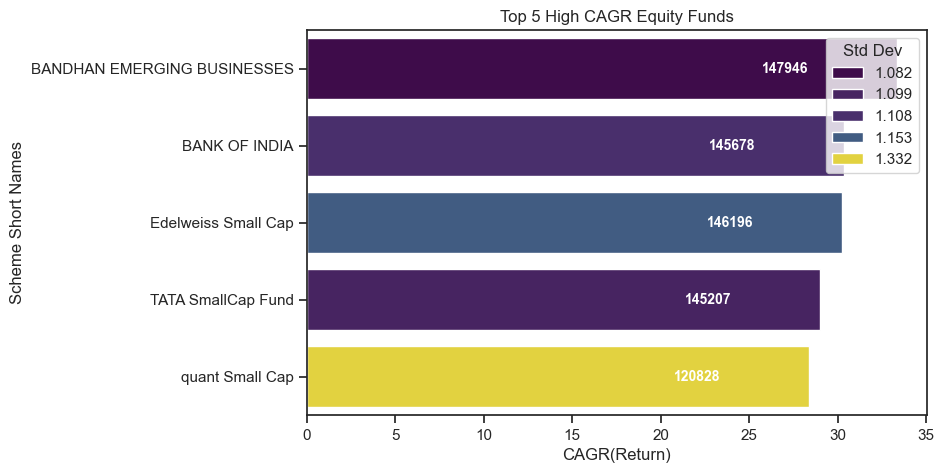

In [8]:
# Getting the top funds in form of bar chart for easily identifying the top funds and their CAGRs and Standard deviations
df_top_equity_funds["short_name"] = df_top_equity_funds["Scheme_Name"].apply(lambda x: " ".join(x.split()[:3])) #Short Names for fitting in Chart

sns.set_theme(style='ticks')
plt.figure(figsize=(8,5))
sns.barplot(data=df_top_equity_funds.nlargest(5,"CAGR"),x='CAGR',y='short_name',hue='std_dev',palette='viridis')
plt.xlabel('CAGR(Return)')
plt.ylabel('Scheme Short Names')
for index, row in enumerate(df_top_equity_funds.nlargest(5, "CAGR").itertuples()):
    plt.text(
        row.CAGR - 5,  # Adjust position to be inside
        index, 
        row.Scheme_Code, 
        ha="right", 
        va="center", 
        fontsize=10, 
        color="white", 
        fontweight="bold"
    )
plt.title("Top 5 High CAGR Equity Funds")
plt.legend(title="Std Dev", loc="upper right")
plt.show()


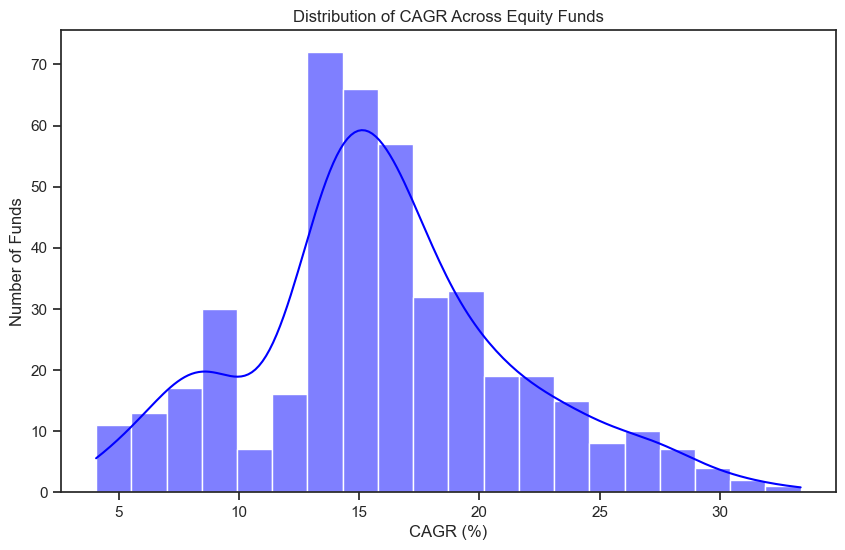

In [9]:
# Histogram for Analysing returns of Equity Schemes
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')
df_equity = df_schemes[df_schemes['Scheme_Category'].str.contains('Equity',case=False,na=False)]
sns.histplot(data=df_equity['CAGR'],bins=20,kde=True,color='blue')
plt.xlabel("CAGR (%)")
plt.ylabel("Number of Funds")
plt.title("Distribution of CAGR Across Equity Funds")
plt.show()

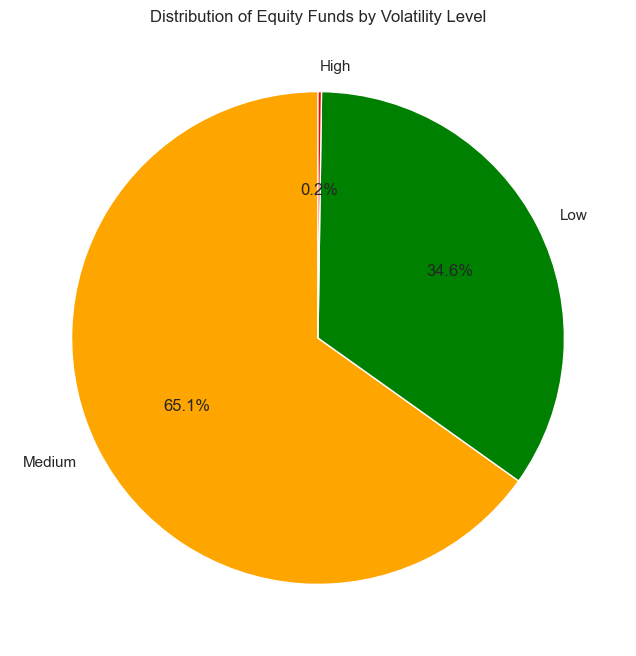

In [12]:
df_equity = df_equity.copy()
df_equity["Volatility_Level"] = pd.cut(
df_equity["std_dev"], 
bins=[0, 1, 1.5, 2.5], 
labels=["Low", "Medium", "High"]
)

plt.figure(figsize=(8,8))
df_equity["Volatility_Level"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, colors=["orange","green", "red"]
)
plt.title("Distribution of Equity Funds by Volatility Level")
plt.ylabel("") 
plt.show()


In [14]:
# Getting Equity funds with low volatility (less risk) for conservative investors on basis of std_dev, sortino and CAGR
safer_equity_options = df_equity[(df_equity['Volatility_Level'].str.contains("Medium")) | (df_equity['Volatility_Level'].str.contains("Low") )]
safer_equity_options = safer_equity_options[safer_equity_options['CAGR'] >= 15].sort_values(by='std_dev')
safer_equity_options.head(5)
# Funds with the least standard deviations are good for people who want some stability in their high risk portfolios along with above average CAGR
# These are also good for conservative investors who want to boost their returns while not taking very high risks (Sorting by highest CAGR will be better for these investors since their motive may be to boost overall returns)

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Estimated_Beta,alpha,Sortino_Ratio,Sharpe_annual,Volatility_Level
1237,DSP Mutual Fund,Open Ended Schemes,Equity Scheme - Value Fund,148594,DSP Value Fund - Regular Plan - Growth,0.667,3,16.395,3.706481,-2.758,1.139472,1.511488,Low
1238,DSP Mutual Fund,Open Ended Schemes,Equity Scheme - Value Fund,148595,DSP Value Fund - Direct Plan - Growth,0.667,3,17.282,3.707292,-1.985,1.212485,1.584420,Low
1428,Baroda BNP Paribas Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,150212,BARODA BNP PARIBAS Mid Cap Fund - Direct Plan ...,0.821,1,16.051,4.562919,-6.288,0.917618,1.219808,Low
1304,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Multi Cap Fund,148918,Aditya Birla Sun Life Multi-Cap Fund-Regular G...,0.846,2,15.879,4.698902,-6.942,0.882855,1.176300,Low
1305,Aditya Birla Sun Life Mutual Fund,Open Ended Schemes,Equity Scheme - Multi Cap Fund,148919,Aditya Birla Sun Life Multi-Cap Fund-Regular-I...,0.846,2,15.879,4.698570,-6.941,0.882908,1.176374,Low
